In [23]:
"""
本次预处理作业来源华数杯2022年C题
问题类型为近年国赛热点题型对照实验
国赛近年统计学方向考题以及考频在课中有讲解
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

plt.rcParams['font.family'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-pastel')
warnings.filterwarnings('ignore')

### 数据理解

表1中给到了25组对照实验的结果，实验参数需要与excel中的表2相对应 \
表3中的所有数据都是插层后的结果，为了避免误差，实验重复了三次   \
这里我顺带着也把问题3的缺失值处理了,这里不处理缺失值不影响问题1、2的分析

In [24]:
df1 = pd.read_excel('./数据.xlsx', sheet_name=0)
df2 = pd.read_excel('./数据.xlsx', sheet_name=1, index_col=0) 
df3 = pd.read_excel('./数据.xlsx', sheet_name=2)

df1['组号'] = df1['组号'].ffill()  # 由于表格中使用了合并单元格，表格读取到的组号只能识别到一个，所以使用ffill函数，使用上一个值来填充缺失值
df1['插层率（%）'] = df1['插层率（%）'].fillna(0)  # 插层率是对照实验，我们课中讲过，一般赛题中对照实验数据的空值都是0，即一个是实验组，一个是对照组
df1.dropna(axis=0, how='any', inplace=True)  # 最后一行的备注我们不关注，刚好它有缺失值，我们就使用dropna删掉他
df1

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,0.00
1,1.0,2#,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,0.00
3,2.0,2#,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,0.00
5,3.0,2#,3.425,96.95,94.33,10.133,34.600,643.40,31.45
6,4.0,1#,2.095,94.70,83.01,13.900,11.767,474.50,0.00
7,4.0,2#,3.400,96.93,82.88,10.600,33.900,603.17,19.37
8,5.0,1#,2.235,95.03,86.04,19.230,20.767,347.23,0.00
9,5.0,2#,3.845,97.30,75.97,15.700,54.500,405.83,31.19


In [25]:
df2  # 可以看到，python读取交叉表的时候有一些问题，那么很简单，我们删除全为空的行和列即可

,Unnamed: 1,800,900,1000,1100,1200
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,21.0,22.0,23.0,24.0,25.0
25,NaN,16.0,17.0,18.0,19.0,20.0
30,NaN,11.0,12.0,13.0,14.0,15.0
35,NaN,6.0,7.0,8.0,9.0,10.0
40,NaN,1.0,2.0,3.0,4.0,5.0
表格里的编号为组号，与data1第一列对应,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2 = df2.dropna(axis=0, how='all').dropna(axis=1, how='all')
# 下面的数据就是与表1、表3一一对应的值了
df2

,800,900,1000,1100,1200
20,21.0,22.0,23.0,24.0,25.0
25,16.0,17.0,18.0,19.0,20.0
30,11.0,12.0,13.0,14.0,15.0
35,6.0,7.0,8.0,9.0,10.0
40,1.0,2.0,3.0,4.0,5.0


In [27]:
df3

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
0,40,800,2.766014,96.204429,84.763264,24.756047,48.211693,654.149177
1,40,800,2.754933,95.879200,84.969388,26.008212,51.443315,609.854645
2,40,800,2.756595,95.965270,84.648600,26.222296,49.679948,635.112175
3,40,900,3.051175,96.114384,85.315207,27.167856,48.599384,521.793019
4,40,900,3.051480,96.924714,85.365072,25.323787,45.963814,553.848607
...,...,...,...,...,...,...,...,...
70,20,1100,2.328757,95.012779,86.629560,28.862761,80.012340,206.124684
71,20,1100,2.328183,95.307393,85.896752,30.559225,81.993644,206.336370
72,20,1200,2.422073,96.046859,85.250841,28.296636,83.095760,209.181523
73,20,1200,2.402290,95.588749,85.144912,27.499004,83.201109,208.566982


### 问题1
分析所有数据的基础统计学特征（均值、中位数、方差等等）

In [28]:
df1.describe()

,组号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,13.000000,2.063100,94.105200,83.032200,26.970860,42.189360,384.869200,11.517800
std,7.284314,0.722226,2.387573,8.085928,15.743696,23.166188,215.611906,14.174552
min,1.000000,0.870000,87.230000,43.910000,7.200000,1.733000,137.170000,0.000000
25%,7.000000,1.542500,92.887500,80.700000,14.592750,23.366500,234.265000,0.000000
50%,13.000000,1.992500,94.530000,83.575000,22.601500,42.033000,317.480000,1.250000
75%,19.000000,2.675000,96.170000,87.475000,33.925000,60.141500,477.520000,21.242500
max,25.000000,3.845000,97.300000,94.590000,65.770000,86.967000,1019.670000,50.870000


In [29]:
df3.describe()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,30.000000,1000.000000,2.607073,95.879153,86.607884,28.899910,52.027827,433.676768
std,7.118685,142.373699,0.472240,0.820229,1.216714,4.602219,10.773998,85.332046
min,20.000000,800.000000,1.697782,93.738740,83.516865,18.142076,38.144896,206.124684
25%,25.000000,900.000000,2.328470,95.374362,85.646753,26.145198,46.647549,409.765249
50%,30.000000,1000.000000,2.608046,96.053980,86.794338,28.574386,49.623279,429.708201
75%,35.000000,1100.000000,2.924851,96.506949,87.509884,31.809941,52.428576,464.822843
max,40.000000,1200.000000,3.527112,97.284382,88.661312,40.255958,83.201109,654.149177


### 问题二
根据是否插层进行分组，分析各组别的基础统计学特征

In [30]:
df1.groupby('编号').describe().T  # .T是矩阵转置的意思，方便我们查看数据

编号                   1#         2#
组号     count  25.000000  25.000000
       mean   13.000000  13.000000
       std     7.359801   7.359801
       min     1.000000   1.000000
       25%     7.000000   7.000000
...                 ...        ...
插层率（%） min     0.000000   2.500000
       25%     0.000000  16.530000
       50%     0.000000  21.710000
       75%     0.000000  31.190000
       max     0.000000  50.870000

[64 rows x 2 columns]

In [31]:
# 或者使用query查询函数来分别取值
df1.query('编号 == "1#"').describe()

,组号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.0
mean,13.000000,1.518800,92.349200,79.44160,29.784400,34.992040,347.604000,0.0
std,7.359801,0.382618,2.090879,9.32606,16.462431,25.130497,189.575125,0.0
min,1.000000,0.870000,87.230000,43.91000,8.130000,1.733000,137.170000,0.0
25%,7.000000,1.170000,91.520000,76.54000,16.530000,11.767000,219.730000,0.0
50%,13.000000,1.540000,92.830000,80.91000,27.030000,34.000000,268.830000,0.0
75%,19.000000,1.830000,93.930000,83.89000,37.870000,53.900000,474.500000,0.0
max,25.000000,2.235000,95.030000,90.36000,65.770000,80.033000,795.570000,0.0


In [32]:
# 对比两组数据的统计学特征，可以明显看出插层和不插层之间统计学特征存在差异
df1.query('编号 == "2#"').describe()

,组号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,2.60740,95.861200,86.622800,24.157320,49.386680,422.134400,23.035600
std,7.359801,0.54895,0.917997,4.433299,14.783515,18.874436,236.816734,11.568623
min,1.000000,1.74000,94.000000,75.970000,7.200000,19.967000,156.330000,2.500000
25%,7.000000,2.08500,94.990000,83.200000,14.067000,34.600000,242.600000,16.530000
50%,13.000000,2.72500,96.170000,86.470000,20.467000,47.000000,329.730000,21.710000
75%,19.000000,2.93500,96.470000,90.110000,29.333000,61.433000,603.170000,31.190000
max,25.000000,3.84500,97.300000,94.590000,62.033000,86.967000,1019.670000,50.870000


下面合并表2与表1

In [33]:
# 遍历每一个单元格，把热风速度和接收距离加到表1内

df1['热风速度'] = None
df1['接收距离'] = None
for c in df2.columns:
    for i in df2.index:
        number = df2.loc[i, c]  # loc表示索引，第一个参数是行，第二个是列
        code = df1.query('组号 == @number')  # 查询语句中，可以用@来引入变量
        code['热风速度'] = c  # 热风速度就是表2中的列
        code['接收距离'] = i  # 接收距离就是表2中的行
        df1.update(code)     # 更新表1

df1['热风速度'] = pd.to_numeric(df1['热风速度'])  # 把他们转成数值类型
df1['接收距离'] = pd.to_numeric(df1['接收距离'])
df1

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）,热风速度,接收距离
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,0.00,800.0,40.0
1,1.0,2#,2.810,96.28,83.20,7.533,19.967,1019.67,36.44,800.0,40.0
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,0.00,900.0,40.0
3,2.0,2#,2.910,96.41,86.65,7.200,24.967,968.63,24.74,900.0,40.0
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,0.00,1000.0,40.0
5,3.0,2#,3.425,96.95,94.33,10.133,34.600,643.40,31.45,1000.0,40.0
6,4.0,1#,2.095,94.70,83.01,13.900,11.767,474.50,0.00,1100.0,40.0
7,4.0,2#,3.400,96.93,82.88,10.600,33.900,603.17,19.37,1100.0,40.0
8,5.0,1#,2.235,95.03,86.04,19.230,20.767,347.23,0.00,1200.0,40.0
9,5.0,2#,3.845,97.30,75.97,15.700,54.500,405.83,31.19,1200.0,40.0


### 问题4
分析各项指标之间的相关性，并根据是否插层进行分组，再次计算各个指标的相关性

Text(0.5, 1.0, '表3')

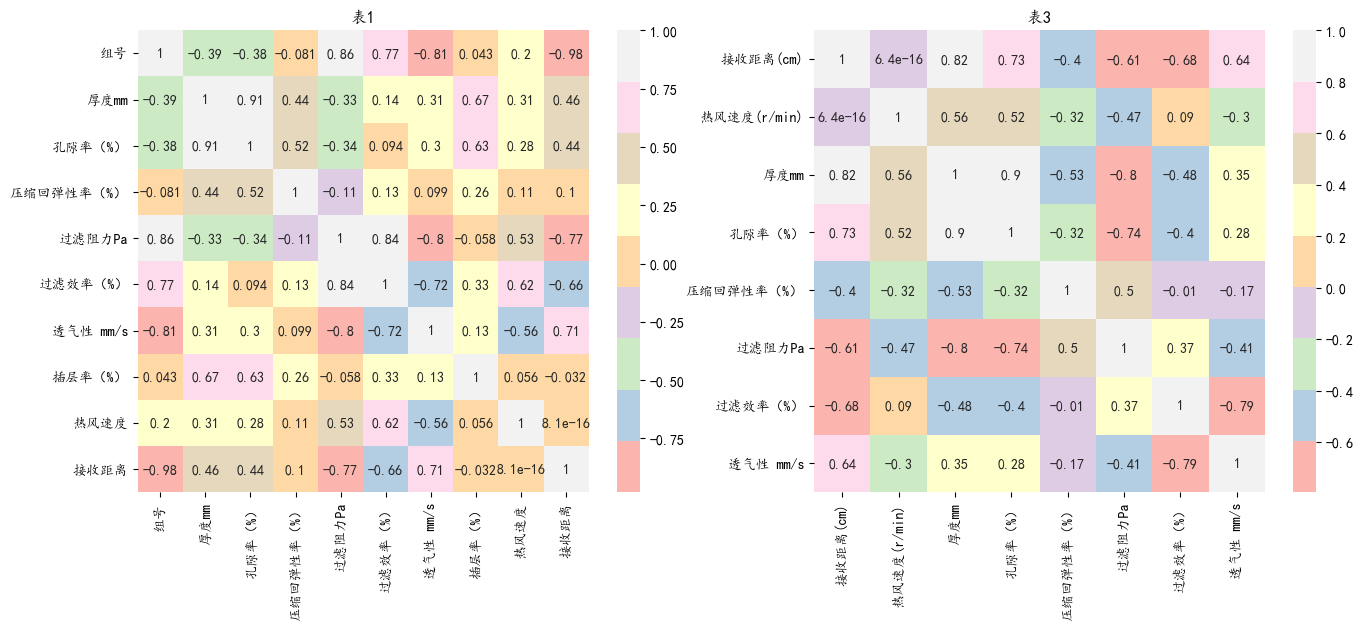

In [34]:
# 这里我方便演示把表1和表3数据放在一个图里了，注意实战不要这么做，因为图放在一起是为了对比的，做对照的时候可以放在一起

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='Pastel1')
plt.title('表1')

plt.subplot(122)
sns.heatmap(df3.corr(numeric_only=True), annot=True, cmap='Pastel1')
plt.title('表3')

Text(0.5, 1.0, '表3')

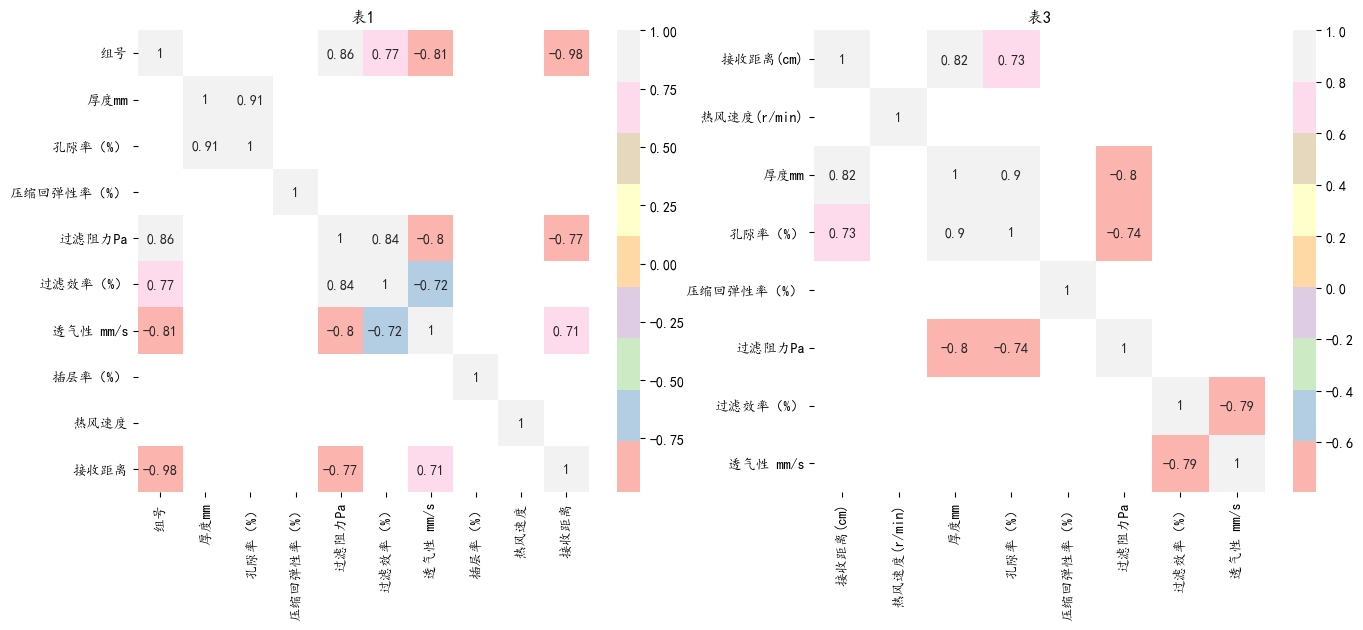

In [35]:
"""
一个小技巧，只显示强相关特征
"""

corr1 = df1.corr(numeric_only=True)
mask1 = corr1.abs() < 0.7

corr3 = df3.corr(numeric_only=True)
mask3 = corr3.abs() < 0.7

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(corr1, mask=mask1, annot=True, cmap='Pastel1')
plt.title('表1')

plt.subplot(122)
sns.heatmap(corr3, mask=mask3, annot=True, cmap='Pastel1')
plt.title('表3')

Text(0.5, 1.0, '插层')

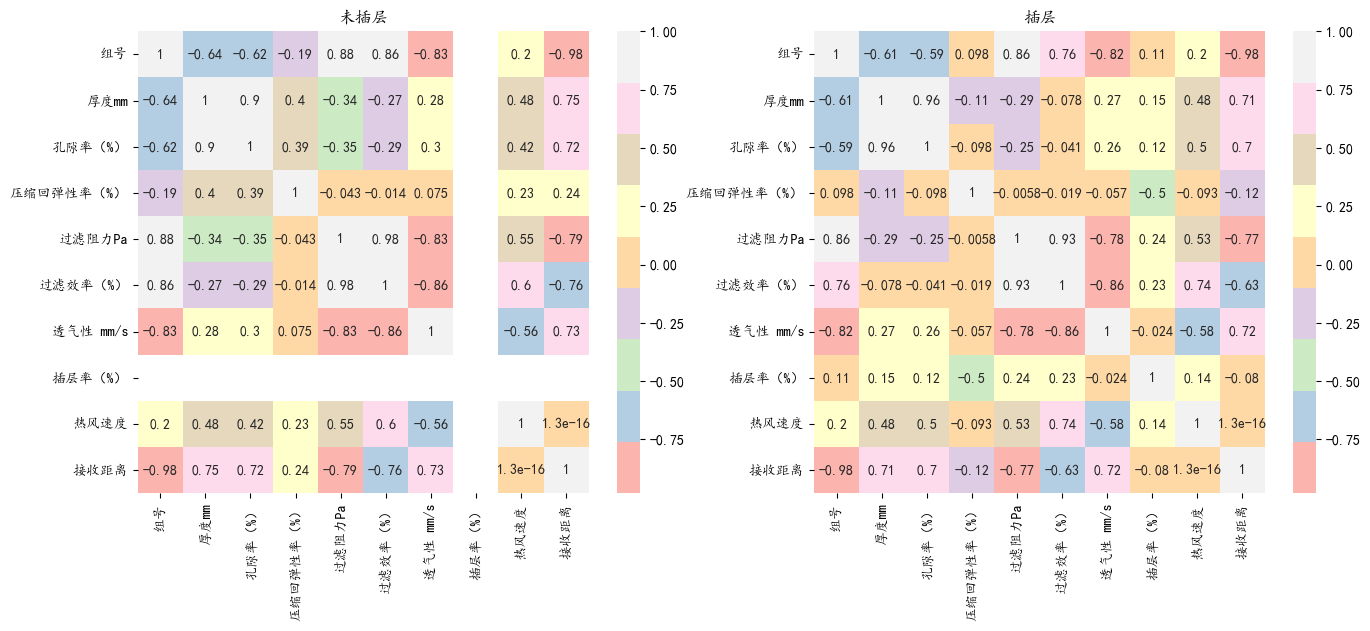

In [36]:
#  分组后重新展示相关性

group1 = df1.query('编号 == "1#"')
group2 = df1.query('编号 == "2#"')
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(group1.corr(numeric_only=True), annot=True, cmap='Pastel1')
plt.title('未插层')

plt.subplot(122)
sns.heatmap(group2.corr(numeric_only=True), annot=True, cmap='Pastel1')
plt.title('插层')

###  问题5
通过假设检验，判断插层对各项指标是否产生影响

In [37]:
# 前面我们查看统计学特征的时候，发现插层前后均值有差异，所以使用T检验来查看差异情况
# 一共有如下6个指标
columns = df1.columns[2: 8]
columns

Index(['厚度mm', '孔隙率（%）', '压缩回弹性率（%）', '过滤阻力Pa', '过滤效率（%）', '透气性 mm/s'], dtype='object')

In [50]:
for col in columns:
    # 可以视为同一样本在不同情况下的差异，所以这里使用的是配对样本T检验
    test = stats.ttest_rel(group1[col], group2[col], alternative="less")
    # 可以看出，除了过滤阻力，其他指标中，未插层的均值都显著低于插层的，过滤阻力P值为1，则应该为显著高于插层的，可以把参数alternative='less'改成='greater'再试试看
    print(f"{col}:\t stats: {test[0]} \t p_value: {test[1].round(5)}")

厚度mm:	 stats: -15.60666455830434 	 p_value: 0.0
孔隙率（%）:	 stats: -11.305879500025384 	 p_value: 0.0
压缩回弹性率（%）:	 stats: -3.2214984793891825 	 p_value: 0.00182
过滤阻力Pa:	 stats: 7.8663777869413885 	 p_value: 1.0
过滤效率（%）:	 stats: -7.695707085432171 	 p_value: 0.0
透气性 mm/s:	 stats: -5.651039711914685 	 p_value: 0.0


      组号  编号   厚度mm  孔隙率（%）  压缩回弹性率（%）  过滤阻力Pa  过滤效率（%）  透气性 mm/s  插层率（%）  \
0    1.0  1#  1.715   93.52      77.84    8.13    4.967    777.10     0.0   
2    2.0  1#  1.830   93.93      86.23   10.47    1.933    795.57     0.0   
4    3.0  1#  1.890   94.12      82.12   11.87    4.300    564.93     0.0   
6    4.0  1#  2.095   94.70      83.01   13.90   11.767    474.50     0.0   
8    5.0  1#  2.235   95.03      86.04   19.23   20.767    347.23     0.0   
10   6.0  1#  1.390   92.01      82.33   11.47    1.733    685.97     0.0   
12   7.0  1#  1.705   93.48      90.36   14.67    8.500    477.57     0.0   
14   8.0  1#  1.550   92.83      89.47   22.17   19.200    326.33     0.0   
16   9.0  1#  1.915   94.20      74.37   26.77   37.200    268.83     0.0   
18  10.0  1#  1.830   93.93      72.79   32.30   40.667    242.40     0.0   
20  11.0  1#  1.170   90.50      65.03   16.53   11.300    477.37     0.0   
22  12.0  1#  1.365   91.86      83.33   19.90   20.567    367.50     0.0   

Text(0.5, 1.0, '插层')

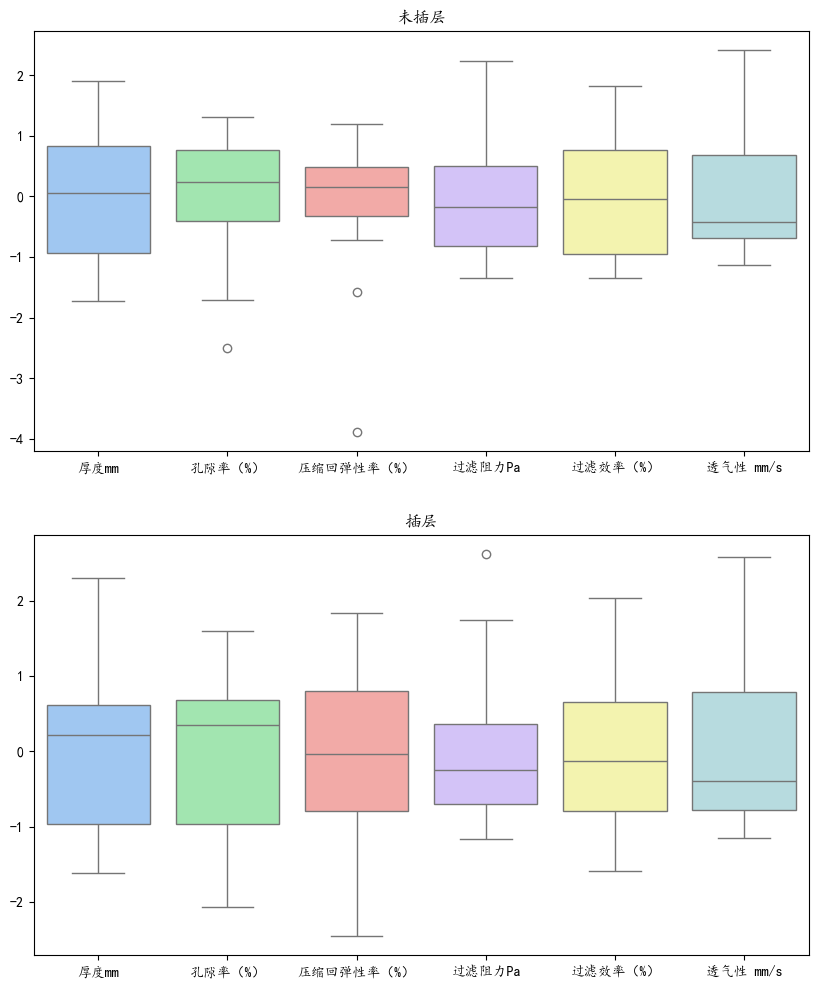

In [39]:
from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(group1[columns])
X2 = StandardScaler().fit_transform(group2[columns])
print(group1)
X1 = pd.DataFrame(X1, columns=columns)
X2 = pd.DataFrame(X2, columns=columns)
print(X1)
plt.figure(figsize=(10, 12))
plt.subplot(211)
sns.boxplot(X1)
plt.title('未插层')
plt.subplot(212)
sns.boxplot(X2)
plt.title('插层')

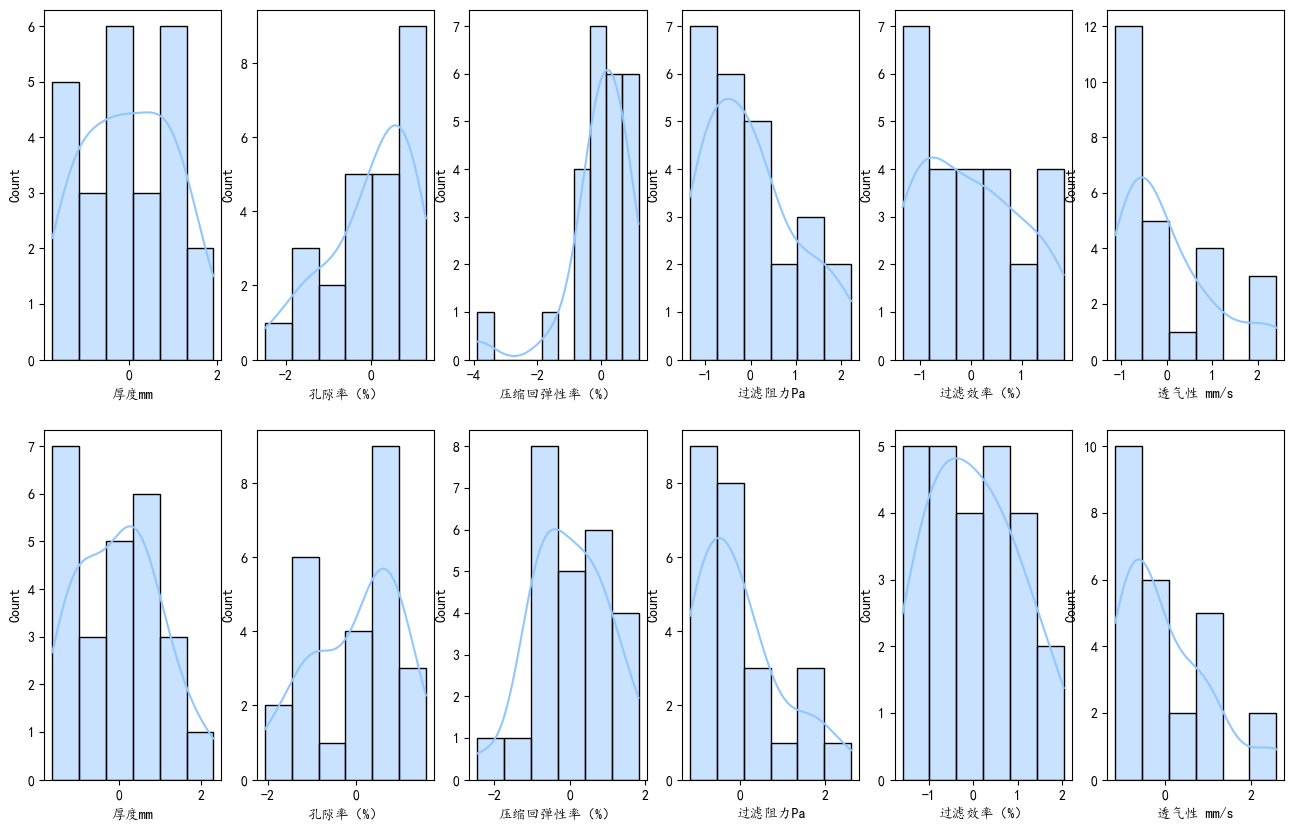

In [40]:
# 上面6个是未插层的，下面6个是插层的

plt.figure(figsize=(16, 10))
for i in range(len(columns)):
    plt.subplot(2, 6, i+1)
    sns.histplot(X1[columns[i]], kde=True)

for i in range(len(columns)):
    plt.subplot(2, 6, i+7)
    sns.histplot(X2[columns[i]], kde=True)

### 问题7
（可选）*量化各项指标变化与插层变化间的情况 \
现阶段对于同学们来说可能比较困难，仅作参考。 \
该题没有标准答案，可以参考一下我当时的国一解决方案

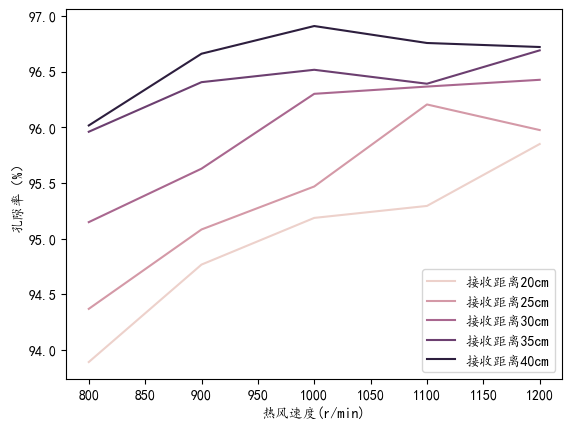

In [41]:
# 这里的特征选取依赖上文的相关性分析

sns.lineplot(df3, x='热风速度(r/min)', y='孔隙率（%）' , hue='接收距离(cm)', errorbar=None)
plt.legend(['接收距离20cm', '接收距离25cm', '接收距离30cm', '接收距离35cm', '接收距离40cm'])

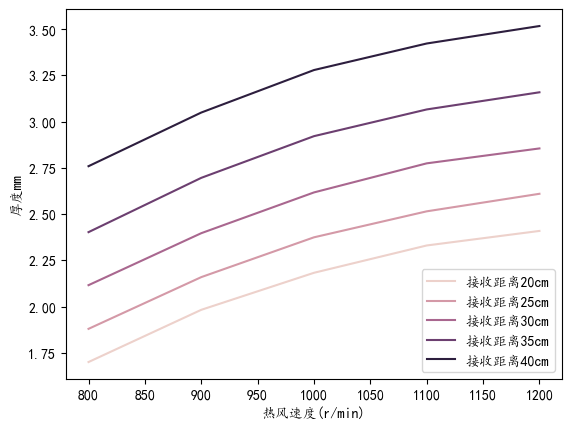

In [42]:
# 可以看出来有一点点的非线性关系在
sns.lineplot(df3, x='热风速度(r/min)', y='厚度mm' , hue='接收距离(cm)', errorbar=None)
plt.legend(['接收距离20cm', '接收距离25cm', '接收距离30cm', '接收距离35cm', '接收距离40cm'])

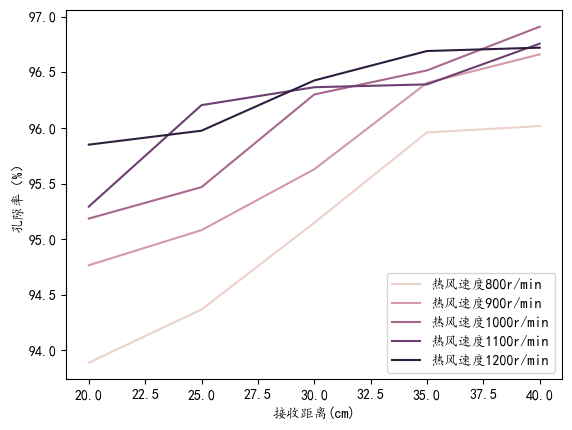

In [43]:
sns.lineplot(df3, x='接收距离(cm)', y='孔隙率（%）' , hue='热风速度(r/min)', errorbar=None)
plt.legend(['热风速度800r/min', '热风速度900r/min', '热风速度1000r/min', '热风速度1100r/min', '热风速度1200r/min'])

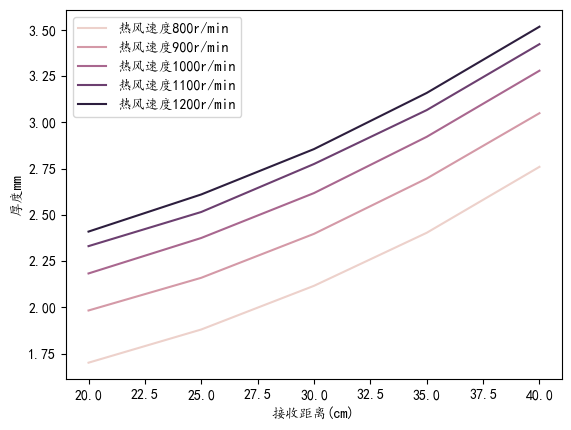

In [44]:
# 同样的，可以看出来一部分的非线性关系

sns.lineplot(df3, x='接收距离(cm)', y='厚度mm' , hue='热风速度(r/min)', errorbar=None)
plt.legend(['热风速度800r/min', '热风速度900r/min', '热风速度1000r/min', '热风速度1100r/min', '热风速度1200r/min'])

In [45]:
# 量化非线性关系，我们课程上说过可以使用多项式的方法来做特征衍生

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(df3[['接收距离(cm)', '热风速度(r/min)']])
# x1 为接受距离，x2 为热风速度，则得到 x1, x2, x1^2, x1*x2, x2^2
x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x, df3['厚度mm'], random_state=42)
linear = LinearRegression().fit(X_train, y_train)
# 看到，准确率高达99.97%
linear.score(X_test, y_test)

0.999735748165748

量化得到厚度$g=0.3839x_1+0.26122x_2+0.05592x_1^2+0.00686x_1x_2-0.06681x_2^2+2.6179$(标准化后,厚度不标准化)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, df3['孔隙率（%）'], random_state=42)
linear2 = LinearRegression().fit(X_train, y_train)
# 同理可得接受距离、热风速度与孔隙率的关系，实际上这里用厚度来量化孔隙率准确率更高，但为了解释性，可以考虑先计算厚度与孔隙率之间的，再把厚度换成上面的工艺参数(热风速度和接收距离)
print(linear2.coef_, linear2.intercept_, linear2.score(X_test, y_test))
# 往下继续可得到压缩回弹性与工艺参数间的关系，采用相同的方法

[ 0.59604357  0.42244314 -0.11929135 -0.17657153 -0.18220781] 96.15971620809673 0.911882170293218


下面可以参考一下后续做出来的效果，不过毕竟是几年前做的结果，现在看来还有不少优化空间，大家可以参考继续优化

![image.png](图1.png)
![image.png](图2.png)
![image.png](图3.png)